In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,mean_squared_error,f1_score,mean_absolute_error,r2_score

In [4]:
df=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.rename(columns={0:'buying',1:'maint',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for col in df.columns[:]:
    print(col,df[col].value_counts())

buying buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety safety
low     576
med     576
high    576
Name: count, dtype: int64
class class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


### **_lets  look into data_**

In [7]:
counts=df['class'].value_counts()
counts

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

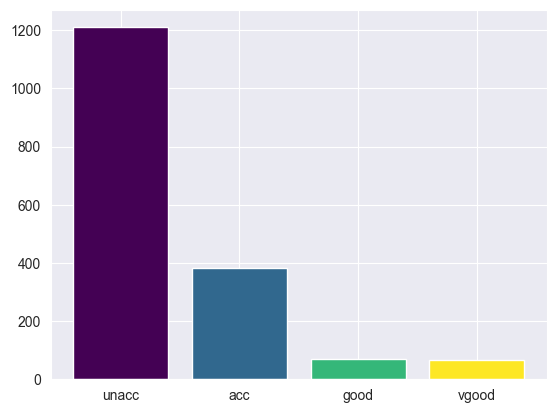

In [8]:
import  matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, len(counts)))
plt.bar(counts.index,counts,color=colors)
plt.show()

**conclusion**
------
**the mostly cars are highest numbers are unacc**

**the cars  with acc are moderate**

**the cars with good and vgood are every least number of cars**

In [9]:
safet=df.groupby('safety')['class'].value_counts().reset_index()
safet

,safety,class,count
0,high,unacc,277
1,high,acc,204
2,high,vgood,65
3,high,good,30
4,low,unacc,576
5,med,unacc,357
6,med,acc,180
7,med,good,39


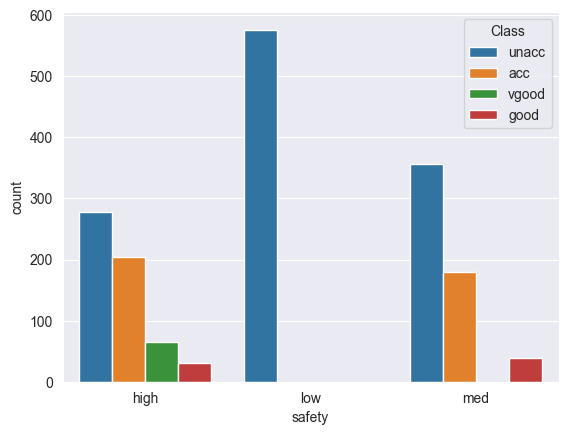

In [10]:
sns.barplot(x='safety',y='count',hue='class',data=safet)
plt.xlabel('safety')
plt.ylabel('count')
plt.legend(title='Class', loc='upper right')
plt.show()

**conclusion**
-----
**The high safety cars with condition  no of car**
**1.unacc**
**2.acc**
**3.vgood**
**4.good**

**The cars that have low safety  with condition unacc  highest number of cars**



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

### **_Feature Engineering_**

In [15]:
!pip install category_encoders
import category_encoders as ce
from  sklearn .preprocessing import LabelEncoder



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
buying_encoder=ce.OrdinalEncoder()
df['buying']=buying_encoder.fit_transform(df['buying'])
maint_encoder=ce.OrdinalEncoder()
df['maint']=maint_encoder.fit_transform(df['maint'])
safety_encoder=ce.OrdinalEncoder()
df['safety']=safety_encoder.fit_transform(df['safety'])
lug_boot_encoder=ce.OrdinalEncoder()
df['lug_boot']=lug_boot_encoder.fit_transform(df['lug_boot'])
class_encoder=ce.OrdinalEncoder()
df['class']=class_encoder.fit_transform(df['class'])
door_encoder=ce.OrdinalEncoder()
df['doors']=door_encoder.fit_transform(df['doors'])
persons_encoder=ce.OrdinalEncoder()
df['persons']=persons_encoder.fit_transform(df['persons'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


### **_lets train the RandomForestClassification model_**

In [18]:
x=df.drop(columns='class')
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
rand_classi_model=RandomForestClassifier(n_estimators=100,random_state=42)
rand_classi_model.fit(x_train,y_train)
y_pred=rand_classi_model.predict(x_test)
print(rand_classi_model.score(x_train,y_train))
print(rand_classi_model.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

1.0
0.9710982658959537
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       235
           2       0.99      0.90      0.94        83
           3       0.89      0.94      0.91        17
           4       0.71      0.91      0.80        11

    accuracy                           0.97       346
   macro avg       0.89      0.94      0.91       346
weighted avg       0.97      0.97      0.97       346

0.9710982658959537


In [19]:
feature=rand_classi_model.feature_importances_
feture=pd.DataFrame({'importance':feature,'features':x.columns})
feture.sort_values('features',ascending=False)
print(feture)

   importance  features
0    0.147183    buying
1    0.162456     maint
2    0.061050     doors
3    0.237184   persons
4    0.093898  lug_boot
5    0.298229    safety


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, mean_squared_error
from imblearn.over_sampling import SMOTE

# Split features and target
x = df.drop(columns=['class'])
y = df['class']

# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
x_re, y_re = sm.fit_resample(x_train, y_train)

# Define base model
rand_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 7, 9],
    'min_samples_split': [3, 5],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search
rand_search_model = GridSearchCV(
    estimator=rand_model,
    param_grid=param_grid,
    scoring='roc_auc_ovr_weighted',   # ✅ use ROC-AUC instead of accuracy for imbalanced data
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
rand_search_model.fit(x_re, y_re)

# Predictions
y_pred = rand_search_model.predict(x_test)
y_pred_prob = rand_search_model.predict_proba(x_test)[:, 1]

# Evaluation
print("Train Score:", rand_search_model.score(x_re, y_re))
print("Test Score:", rand_search_model.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Train Score: 0.9990425360858775
Test Score: 0.9952642929598565

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       242
           2       0.92      0.87      0.89        77
           3       0.81      1.00      0.90        13
           4       0.62      0.93      0.74        14

    accuracy                           0.95       346
   macro avg       0.84      0.94      0.88       346
weighted avg       0.96      0.95      0.95       346

Accuracy: 0.9508670520231214
MSE: 0.11849710982658959


In [37]:
sample=df.iloc[[100]]
print(sample)
sample=sample.drop(columns=['class'])
y_pred_rand_search_model=rand_search_model.predict(sample)
y_pred=rand_classi_model.predict(sample)
print("rand_search_model prediction:", y_pred_rand_search_model)
print("rand_model",y_pred)

     buying  maint  doors  persons  lug_boot  safety  class
100       1      1      4        3         1       2      1
xgb_model prediction: [0]
rand_search_model prediction: [1]
rand_model [1]



### **_Conclusion_**

**_the both RandomForest and RandomForest With GridSearchCv Models are predicting accurately_**